### Урок 3. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [10]:
import numpy as np
import pandas as pd
data=pd.read_csv("non_linear.csv", sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree+1)]).T

Best degree is 7


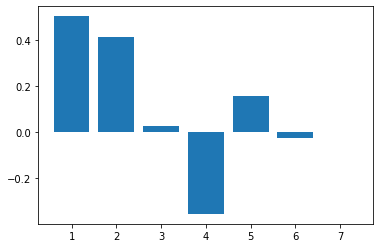

In [12]:
diff_best_fit=1000000
degree_best_fit=1000000
for degree in range (1,10):
    X=generate_degrees(data.x_train, degree)
    y=data.y_train.values
    x_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
    model=Ridge(alpha=0.8).fit(x_train, y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(x_train)
#     print ("Quality on validation: %.3f" % mean_squared_error(y_test, y_pred))
#     print ("Quality on learning: %.3f" % mean_squared_error(y_train, y_pred_train))
#     print (f"Degree is {degree}, Diffference:\
#     {abs(mean_squared_error(y_train, y_pred_train)-mean_squared_error(y_test, y_pred))}")
    diff=abs(mean_squared_error(y_train, y_pred_train)-mean_squared_error(y_test, y_pred))
    if diff< diff_best_fit:
        degree_best_fit=degree
        diff_best_fit=diff
        coef_=model.coef_ 
print("Best degree is", degree_best_fit)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.arange(1, degree_best_fit+1)
ax.bar(x, coef_)
plt.show()

Best degree is 6


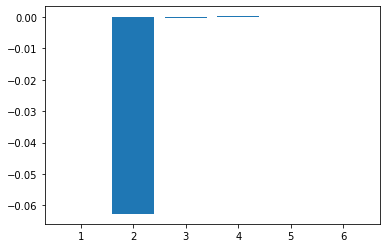

In [32]:
diff_best_fit=1000000
degree_best_fit=1000000
for degree in range (1,10):
    X=generate_degrees(data.x_train, degree)
    y=data.y_train.values
    x_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
    model=Lasso(alpha=0.8, tol=1).fit(x_train, y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(x_train)
    diff=abs(mean_squared_error(y_train, y_pred_train)-mean_squared_error(y_test, y_pred))
    if diff< diff_best_fit:
        degree_best_fit=degree
        diff_best_fit=diff
        coef_=model.coef_ 
print("Best degree is", degree_best_fit)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.arange(1, degree_best_fit+1)
ax.bar(x, coef_)
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

def train_polynomial(degree, data):
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    coeffs=model.coef_
#     print(
#         "Degree %d\nValidation error %.3f\nTrain error %.3f" %
#         (degree, error_valid, error_train)
#     )
#     order_test = np.argsort(X_valid[:,0]) #сортирует данные которые перемешаны после разделения и возвращает индексы   
#     plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
#     print("Weight vector norm \t||w|| = %.2f" % (norm(model.coef_)))
#     # визуализируем решение
#     x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
#     y_linspace = model.predict(generate_degrees(x_linspace, degree))
#     plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_), coeffs

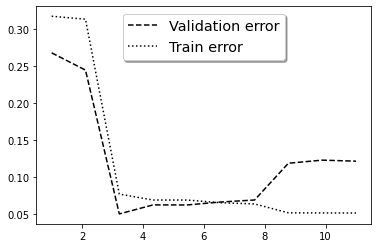

Best degree is 6


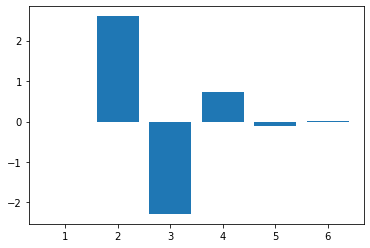

In [15]:
degrees = []
valid_errors = []
train_errors = []
w_norm = [] 
coeffs=[]
i_max=10

for i in range(1,i_max+1):
    error_valid, error_train, coef_norm, coeff = train_polynomial(i, data)
    degrees.append(degree)
    valid_errors.append(error_valid)
    train_errors.append(error_train)
    w_norm.append(coef_norm)
    coeffs.append(coeff)
val, ind_min = min((abs(valid_errors[i]-train_errors[i]), i) for i in range(i_max))
# print (ind_min)
error_diff=[valid_errors[i]-train_errors[i] for i in range (i_max)]

fig, ax = plt.subplots()
degrees=np.linspace(1, i_max+1, num=10)
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

ind=0
for i in range (i_max-1):
    if error_diff[i]<0 and error_diff[i+1]>0:
        ind=i
#         print(error_diff[ind])
if error_diff[ind]*(-1)>error_diff[ind+1]:
    ind+=1
d=ind+1
# print(valid_errors)
# print(train_errors)
# print(error_diff)
print("Best degree is %d" % d)
# print(w_norm[ind])
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.arange(1, d+1)
# print(coeffs[ind])
ax.bar(x, coeffs[ind])
plt.show()

**Задание среднего уровня** Мы использовали реализацию Ridge регрессии из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=6*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.



























[0.1  0.38 0.3  0.18 0.97 0.8  1.83 0.15 1.98 1.97]
Degree 8
Alpha 0.800
Validation error 0.078
Train error 0.056
Weight vector norm 34.189 
[ 9.66146492e+00 -2.04146180e+01  2.18958138e+01 -1.27144165e+01
  4.13819718e+00 -7.57028483e-01  7.27937444e-02 -2.86371930e-03]


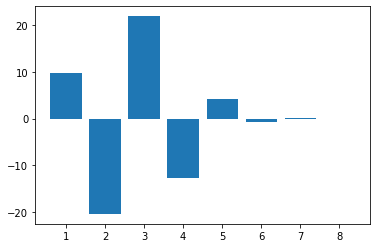

In [16]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.linalg import norm

data=pd.read_csv("non_linear.csv", sep=',')
X=np.array(data.x_train)
y=np.array(data.y_train)
degree=8
alpha=0.8

def fit(X_train, y_train, alpha=0.8):
    X=np.insert(X_train, 0, 1, axis=1)
    X_T_X=(X_train.T).dot(X_train)
    X_T_X_Regul=X_T_X+alpha*(np.eye(len(X_T_X)))
    X_T_X_Inverted=inv(X_T_X)
    w=X_T_X_Inverted.dot(X_train.T).dot(y_train)
    return w

def predict (X_train, X_test, w):
        X=np.insert(X_train, 0, 1, axis=1)
        y_predict=X_test*w.T
        l=list()
        for i in range(0, len(y_predict)):
            l.append(round(y_predict[i].sum(),2))
        y_predict=np.array(l)
        return (y_predict)
    
def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

def train_polynomial(degree, X, y, alpha=0.8):
    _X = generate_degrees(X, degree)
    _y = y
    X_train, X_valid, y_train, y_valid = train_test_split(_X, _y, test_size=0.2, random_state=10)
    w = fit(X_train, y_train, alpha)
    y_pred = predict(X_train, X_valid, w)
    print(y_pred)
    y_pred_train = predict(X_train, X_train, w)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    coeffs=w
    print(
        "Degree %d\nAlpha %.3f\nValidation error %.3f\nTrain error %.3f\nWeight vector norm %.3f " %
        (degree, alpha, error_valid, error_train, norm(w))
    )
    return error_valid, error_train, norm, coeffs

error_valid, error_train, norm, coeffs=train_polynomial(degree, X, y, alpha)

print(coeffs)


fig, ax = plt.subplots()
x = np.arange(1, len(coeffs)+1)
# print(x)
# print(coeff)
ax.bar(x, coeffs)
plt.show()

[0.63 0.45 0.74 0.72 0.81 0.4  0.09 0.56 0.17 0.17]
Degree 1
Alpha 0.800
Validation error 1.332
Train error 1.073
Weight vector norm 0.136 
[ 0.59  1.07  0.04  0.15 -0.4   1.12  0.49  0.85  0.8   0.79]
Degree 2
Alpha 0.800
Validation error 0.847
Train error 0.704
Weight vector norm 0.829 
[-0.14  0.7   0.3   0.15  1.17  1.1   1.44  0.04  1.92  1.92]
Degree 3
Alpha 0.800
Validation error 0.062
Train error 0.118
Weight vector norm 3.159 
[0.03 0.5  0.42 0.32 0.84 0.88 1.77 0.05 2.15 2.15]
Degree 4
Alpha 0.800
Validation error 0.070
Train error 0.087
Weight vector norm 4.534 
[0.04 0.53 0.32 0.23 0.95 0.84 1.96 0.12 2.21 2.21]
Degree 5
Alpha 0.800
Validation error 0.068
Train error 0.082
Weight vector norm 6.026 
[-0.    0.57  0.37  0.26  0.92  0.89  2.05  0.1   2.19  2.2 ]
Degree 6
Alpha 0.800
Validation error 0.070
Train error 0.079
Weight vector norm 7.631 
[0.15 0.46 0.24 0.22 0.95 0.91 2.05 0.06 2.07 2.08]
Degree 7
Alpha 0.800
Validation error 0.080
Train error 0.066
Weight vector no

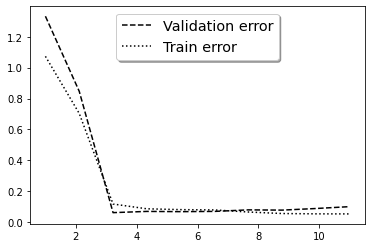

Best degree is 6


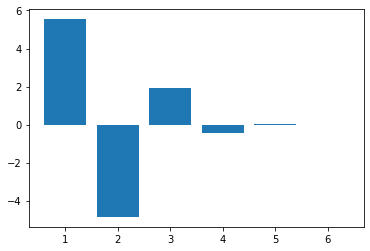

In [17]:
degrees = []
valid_errors = []
train_errors = []
norm_=[]
coeffs=[]
i_max=10

for i in range(1,i_max+1):
    error_valid, error_train, norm, coeff = train_polynomial(i, X,y, alpha)
    degrees.append(degree)
    valid_errors.append(error_valid)
    train_errors.append(error_train)
    norm_.append(norm)
    coeffs.append(coeff)
val, ind_min = min((abs(valid_errors[i]-train_errors[i]), i) for i in range(i_max))
error_diff=[valid_errors[i]-train_errors[i] for i in range (i_max)]

fig, ax = plt.subplots()
degrees=np.linspace(1, i_max+1, num=10)
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

ind=0

for i in range (i_max-1):
    if error_diff[i]<0 and error_diff[i+1]>0:
        ind=i
if error_diff[ind]*(-1)>error_diff[ind+1]:
    ind+=1
d=ind+1
print("Best degree is %d" % d)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.arange(1, d+1)
ax.bar(x, coeffs[ind])
plt.show()